# FRAUD DETECTION

<b> 1. EDA
- About the Dataset
- Loading data
- Describing data
- Visualizations
- Find missings??
- Look correlations (defining the target= "is_fraud")

<b> 2. DATA CLEANING
- Fixing something?
- Visualizations

<b> 3. MODELING (categorical target= binary target)
- Spliting (80-20)
- Scaling
- Model applications
- Visualizzations

<b> 4. Results
- Conclusion visualization

# EDA

## About Dataset

<b> Main Goal : Creating a model to detect fraudulent transactions.
    
    
A typical organization loses an estimated 5% of its yearly revenue to fraud. Of course, the customers want to be ensured that they won’t be charged for the items they did not purchase.
    We will use various predictive models to see how accurate they are.  We will use supervised learning algorithms (Classification) to detect fraudulent behavior similar to past ones. Moreover, in fraud analytics we have to deal with highly imbalanced datasets when classifying fraud versus non-fraud.
   
Why Classification? Classification is the process of predicting discrete variables (binary, Yes/no, etc.).


<b> Background
    
Worldwide financial losses caused by credit card fraudulent activities are worth tens of billions of dollars. One American over ten has been a victim of credit card fraud (median amount of $399), according to the Statistic Brain Research Institute [Ins18]. According to the latest European Central Bank (ECB) report [Ban20], the total level of card fraud losses amounted to €1.8 billion in 2018 in the Single European Payment Area (SEPA).

<b> About the Dataset:
- This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

<b> Columns description :
- trans_date_trans_time = Transaction date and time
- cc_num = Creditcard Number
- merchant = Name of seller
- category = Branch
- amt = Amount
- first = First Name
- last = Last Name
- gender = Gender
- street = Address
- City = City
- Lat = Latitude
- Long = Longitude
- city_pop = City Population
- job = Profession
- dob = Date of Birth
- trans_num = Transaction Number
- unix_time = Time in seconds
- merch_lat = Seller Latitude
- merch_long = Seller Longitude
- is_fraud = Is a Fraud or not

<b> Database (project sample)
- https://www.kaggle.com/code/nathanxiang/credit-card-fraud-analysis-and-modeling/notebook
- https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook#Test-Data-with-Logistic-Regression:
- https://www.kaggle.com/code/ohseokkim/creditcard-fraud-balance-is-key-feat-pycaret
- https://medium.com/analytics-vidhya/credit-card-fraud-detection-in-python-using-scikit-learn-f9046a030f50
<b> Tools
- https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_1_BookContent/HowToUse.html
    

<b> Sparkov_Data_Generation : Generate Fake Credit Card Transaction Data, Including Fraudulent Transactions
- https://github.com/namebrandon/Sparkov_Data_Generation
    
    
<b> Template README template
- https://gist.github.com/DomPizzie/7a5ff55ffa9081f2de27c315f5018afc
    https://github.com/xtreamsrl/jupytemplate/blob/master/jupytemplate/jupytemplate/template.ipynb
    
<b> Another sources
- https://bookdown.org/max/FES/ (statistical models)

- Plotting all the customers fraud and not fraud(M)
- Plotting just the fraud(M)
- Looking for the merchand with most frauds(M)
- Looking for the cc_number with more transactions(M)
- <span class="girk">Relation between the amount and fraud transaction (B)</span>
- zone with more frauds(B)
- age of populations with more frauds (B)
- Time on the dat with more transactions/frauds (B)

## Importing libraries

In [63]:
%matplotlib inline
import numpy as np #working with arrays
import pandas as pd #data processing
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):display(Markdown(string))
import seaborn as sns #visualization
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt #visualization
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # data split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
import missingno as msno
import plotly.express as px
from termcolor import colored as cl # text customization
from sklearn.tree import DecisionTreeRegressor # fitting the decision tree regressor model
from sklearn.tree import DecisionTreeClassifier # fitting the decision tree classifier model
import plotly.figure_factory as ff
from plotly.offline import iplot
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix #to built a confusion matrix
from sklearn.tree import plot_tree  #to built a decision tree
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

## Loading the databases

In [2]:
path = (r"C:/Users/Barbara/OneDrive/Documents/GitHub/IH_final_project/Data/")
dfTrain = pd.read_csv(path + "fraudTrain.csv", index_col=0)
dfTest = pd.read_csv(path + "fraudTest.csv", index_col=0)

## Concatenating

In [3]:
frames =[dfTrain, dfTest]
df1 = pd.concat(frames,axis =0, ignore_index=True)

In [4]:
df1.index.duplicated()

array([False, False, False, ..., False, False, False])

In [5]:
df1.to_csv(path+r'concatenated_df.csv', index = False)

## Describing data

<b> Statistical information about the variables

In [6]:
df1.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [74]:
len(df1["state"].unique())

51

In [75]:
len(df1["city"].unique())

906

In [76]:
len(df1["zip"].unique())

985

In [12]:
# Amount average in dollars
df1_num["amt"].mean()

70.06356747538582

### Getting numerical data

In [10]:
df1_num = df1._get_numeric_data()

In [11]:
df1_num

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


### Checking the imbalanced data

<b> Number of fraud and Non-fraud cases

In [14]:
cases = len(df1)
nonfraud_count = len(df1[df1.is_fraud == 0])
fraud_count = len(df1[df1.is_fraud == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 1852394
Number of Non-fraud cases are 1842743
Number of fraud cases are 9651
Percentage of fraud cases is 0.52
--------------------------------------------


In [77]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Fraud']
values = df1['is_fraud'].value_counts()/df1['is_fraud'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

The data we are dealing with is highly imbalanced data and this siutation has to be handled carefully when modeling and evaluating. Only 9651 (or 0.521%) of transaction are fraudulent. That means the data is highly unbalanced respect with the target variable "is_fraud".

### Relation between the amount and fraud transaction

In [16]:
nonfraud_cases = df1[df1.is_fraud == 0]
fraud_cases = df1[df1.is_fraud == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.amt.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.amt.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    1.842743e+06
mean     6.765128e+01
std      1.535481e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.724000e+01
75%      8.256000e+01
max      2.894890e+04
Name: amt, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64
--------------------------------------------



- For the <span class="girk">non-fraud cases</span> we can observe that total amount is 1 842 743 dolars. The average transaction is 67,65 dolars. Th<span class="mark">e m<span class="mark">in<span class="burk">imum amount to transaction is 1</span> dolar</span></span> and t<span class="burk">he max amount by transaction is 28 648 dolars</span>
- For the <span class="girk">fraud</span> cases we can observe that total amount is 9 651 dolars. The average transaction is 530.6 dolars. The minimum amount to transaction is 1 dolar and the max amount by transaction is 1376.0 dolars</div><i class="fa fa-lightbulb-o "></i>

### Histograms

array([[<AxesSubplot:title={'center':'cc_num'}>,
        <AxesSubplot:title={'center':'amt'}>,
        <AxesSubplot:title={'center':'zip'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'city_pop'}>],
       [<AxesSubplot:title={'center':'unix_time'}>,
        <AxesSubplot:title={'center':'merch_lat'}>,
        <AxesSubplot:title={'center':'merch_long'}>],
       [<AxesSubplot:title={'center':'is_fraud'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

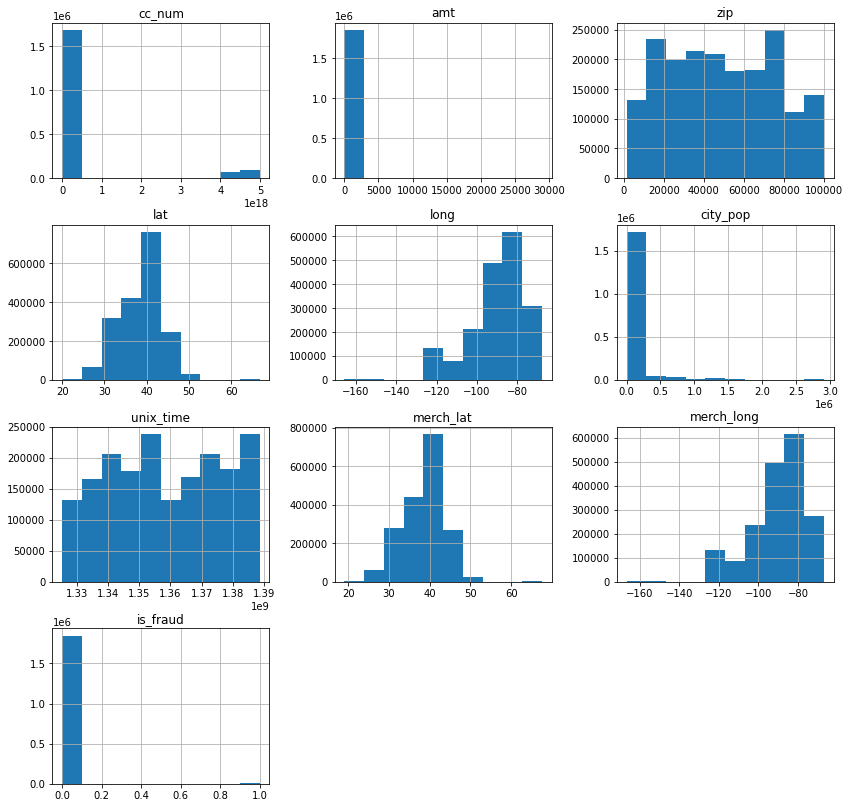

In [17]:
df1_num.hist(figsize=(14,14))

### Challenges

<b> Class imbalance: 
- Transaction data contain much more legitimate than fraudulent transactions: The percentage of fraudulent transactions in a real-world dataset is typically well under 1%. Learning from imbalanced data is a difficult task since most learning algorithms do not handle well large differences between classes. Dealing with class imbalance requires the use of additional learning strategies like sampling or loss weighting, a topic known as imbalanced learning.

<b> Near real-time requirements: 
- Fraud detection systems must be able to quickly detect fraudulent transactions. Given the potentially high volume of transaction data (millions of transactions per day), classification times as low as tens of milliseconds may be required. This challenge closely relates to the parallelization and scalability of fraud detection systems.

<b> Categorical features:
- Transactional data typically contain numerous categorical features, such as the ID of a customer, a terminal, the card type, and so on. Categorical features are not well handled by machine learning algorithms and must be transformed into numerical features. Common strategies for transforming categorical features include feature aggregation, graph-based transformation, or deep-learning approaches such as feature embeddings.

<b> Performance measures:
- Standard measures for classification systems, such as the mean misclassification error or the AUC ROC, are not well suited for detection problems due to the class imbalance issue, and the complex cost structure of fraud detection. A fraud detection system should be able to maximize the detection of fraudulent transactions while minimizing the number of incorrectly predicted frauds (false positives). It is often necessary to consider multiple measures to assess the overall performance of a fraud detection system. Despite its central role in the design of a fraud detection system, there is currently no consensus on which set of performance measures should be used.

# Data Modeling ,imbalanced data and Prediction

## Plan

1. drop :  unix_time/, concatenate firs and last_name, 
convert cc_num from int to object

1. Select the most importants features  in a df based in the EDA , [amount, 
1.1 Scaled the data
2. Spliting the data, X_train/test and y_train/test
3. Balance the  (Xtrain) Train data with SMOTE for numericalvar/SMOTENC for categorical variables (OVERSAMPLING WITH SMOTE°
 To counter this imbalance, it's important to use the SMOTE (Synthetic Minority Oversampling Technique) method to resample the training dataset so that the model can be trained on more balanced data for better results.
4. Apply modelling (Logistic Regression)
5. Confusion matrix
6. Look in the recall metric and accurancy

7. Try with another model Random forest
8


Based on EDA, our mos

## Imbalanced data

<b> Creating a copy of the DataFrame

In [20]:
df1_c = df1.copy()

In [22]:
df1_c_num = df1_c._get_numeric_data()

In [23]:
df1_c_num

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [25]:
df1_c_num["is_fraud"].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

### Splitting data

In [26]:
X=df1_c_num.drop(['is_fraud'], axis=1)
y=df1_c_num.is_fraud

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
X_train, X_test, y_train, y_test

(                      cc_num     amt    zip      lat     long  city_pop  \
 1772823     3506042666828517   65.38  25049  38.1372 -81.5962       630   
 1339014     3566875419572867   88.95   5486  44.6400 -73.3113      1654   
 1211373     2318062975163331   43.95  63353  39.4336 -91.0664      4593   
 932250         4981132848794   64.66  43985  40.0113 -80.9701       128   
 279098      4060579726528237    6.66  66070  39.2136 -95.4404      2661   
 ...                      ...     ...    ...      ...      ...       ...   
 1241052     4671727014157745   73.86  46702  40.8618 -85.6067      2304   
 1066306        4220345354880  100.51  48371  42.8223 -83.2829     24840   
 28030       4926376199189801  227.70  72529  36.3011 -91.5281      4726   
 277869   4355790796238264643   78.12  62360  39.8153 -91.2627      1656   
 773630   4792627764422477317  186.80  66018  38.9462 -94.9714      5760   
 
           unix_time  merch_lat  merch_long  
 1772823  1387024174  38.155308  -81.925

### Scaling numerical data

In [27]:
#fit is to find the right parameters for the z function (in this case mean and standard deviation)
std_scaler = StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
#transform function compute the result for z function.
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## Modeling

Take care of the training-validation and testing
Supervised learning ->
- K-nearest Neighbors
- Decision Trees (adv= highly accurate and reliable/Disv= Need to understand and lable input.)
- Logistic Regression (Sup Learning)
- Ensemble Learning -> Random Forest?? most used. Adv = Avoid the overfiting problem and gives better predictions when compared with a single model/ Computing time high

### KNN Classifier model on the training data

In [28]:
# K-Nearest Neighbors

n = 5

modelknn = KNeighborsClassifier(n_neighbors = n)
modelknn.fit(X_train_scaled, y_train)
knn_y_pred = modelknn.predict(X_test_scaled)
knn_y_pred_train = modelknn.predict(X_train_scaled)

#### Metrics (Accuracy, Precision and Recall)

<b> Function to compute the metrics Accuracy, Precision and recall to the models

In [29]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test


In [32]:
## calling the function to evaluate the calssification model
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, knn_y_pred_train,
                                                    y_test, knn_y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,1.00,1.00
1,Precision,0.75,0.56
2,Recall,0.47,0.33


We can observe in our metrics that the accuracy is not a good metric to describe. We going to follow the recall. In this case, because we're taking the numerical features and unbalanced data, we have a recall of 47% in our train dataset and 33% in our testdataset. The next step is balancing the data to get a better score.

C:\Users\Barbara\anaconda3\envs\BV_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\Barbara\anaconda3\envs\BV_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



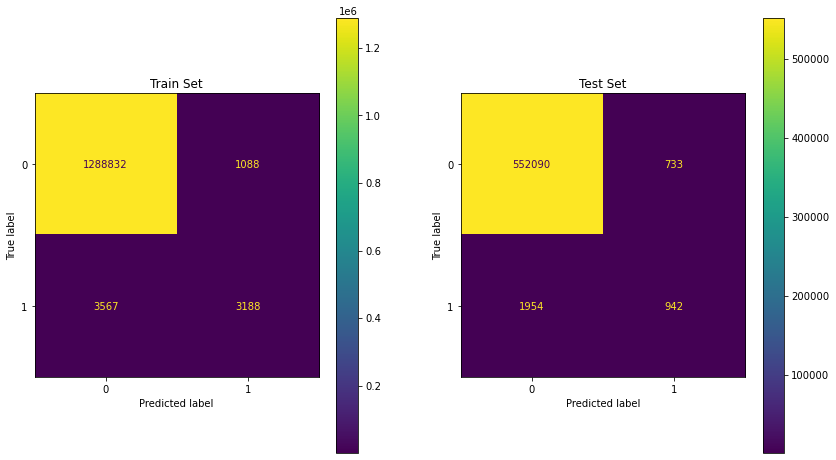

In [33]:
fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(modelknn,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(modelknn,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")
#Train set
# 1 288 832 = True Negatives= True label -> "0" -> (no_fraud)  =  (Tre trnsaction is non-fraud, and it is not actually a fraud)
# 3567 = False Negatives= True label -> "1" -> (fraud)  =  (The transaction is predicted as non-fraud, but actually is a fraud)
# 1088 = False positive= Predicted label -> "1" & True label -> "0"  = (The transaction is predicted as fraud, but it is not actually a fraud)
# 3188  = True positive= Predicted label -> "1" -> (fraud) =  (the transaction is predicted as fraud and it is actually a fraud)


#accurany = how many records are correctly classified?really good prediction =171 + 265 =436 / ()
#accuray score=correctly classified divided by the total of records : 436/(436+19=455)

#presicion = percentage of positive cases that my models is able to catch all the cases (people who have cancer = 19 +265=284)
#how the model is able to catch 265 cases, so 93% =(265/284)


### Decision Trees

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.
- Decision trees do not need feature scaling!!!

In [38]:
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
tree_model = DecisionTreeClassifier(max_depth=10) # we need 3 levels minimum because the model could be overfitting (good preformance on the training set, poor generalization to other data/test data) or so complex.
#skearn dont handle categorical variables.
# 1. Decision Tree
tree_model.fit(X_train, y_train)
tree_y_pred_train = tree_model.predict(X_train)
tree_y_pred_test = tree_model.predict(X_test)

#### Metrics (Accuracy, Precision and Recall)

In [39]:
## calling the function to evaluate the calssification model
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, tree_y_pred_train,
                                                    y_test, tree_y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,1.00,0.99
1,Precision,0.63,0.52
2,Recall,0.41,0.34


C:\Users\Barbara\anaconda3\envs\BV_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\Barbara\anaconda3\envs\BV_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



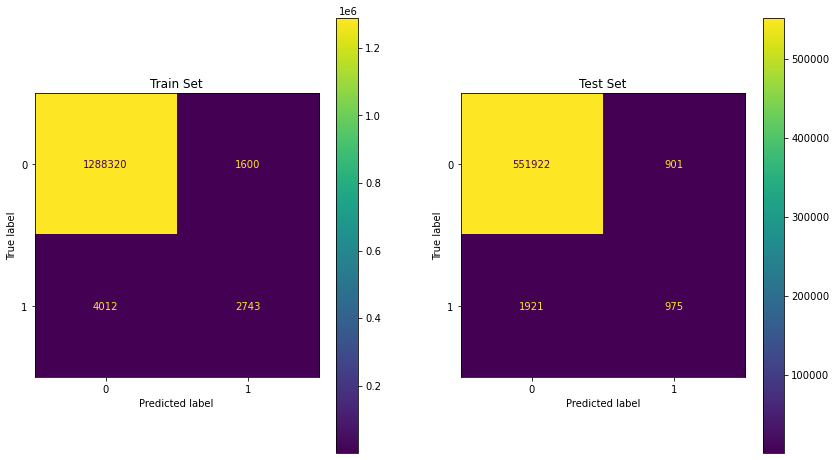

In [40]:
fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(tree_model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(tree_model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


#### Feature Importances

<BarContainer object of 9 artists>

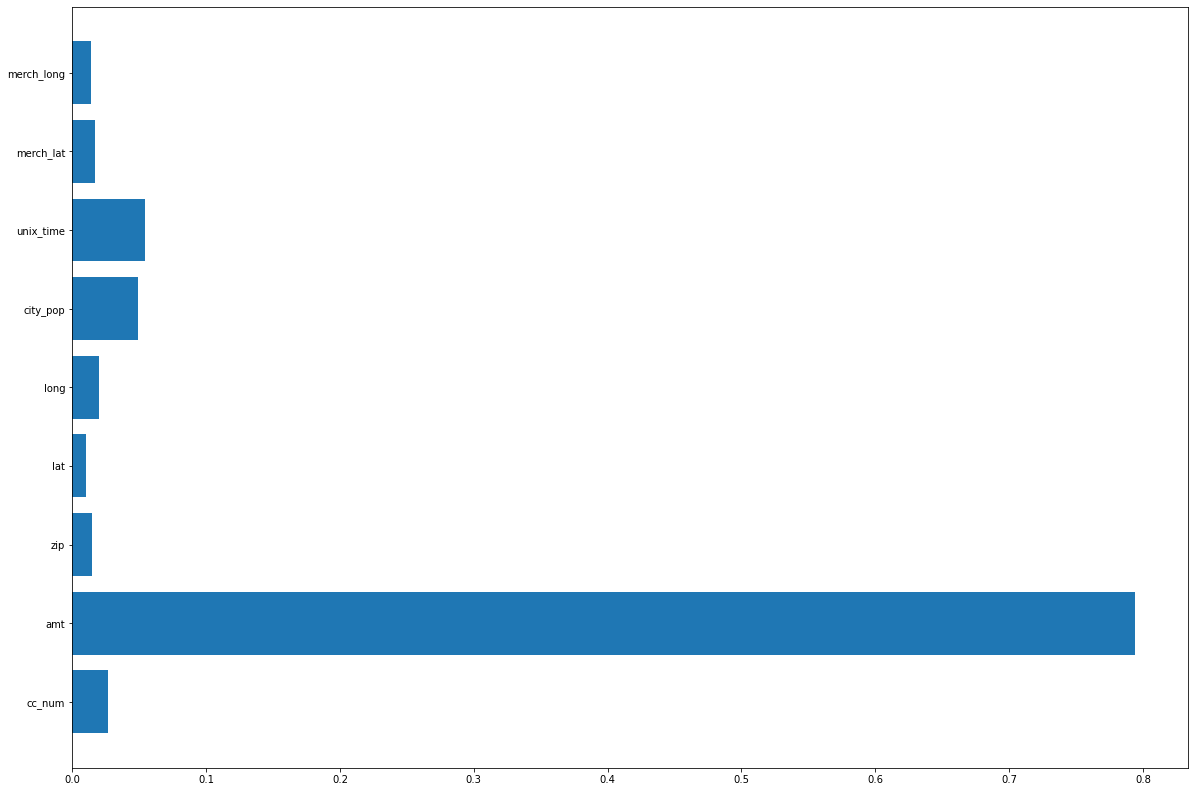

In [41]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,tree_model.feature_importances_)

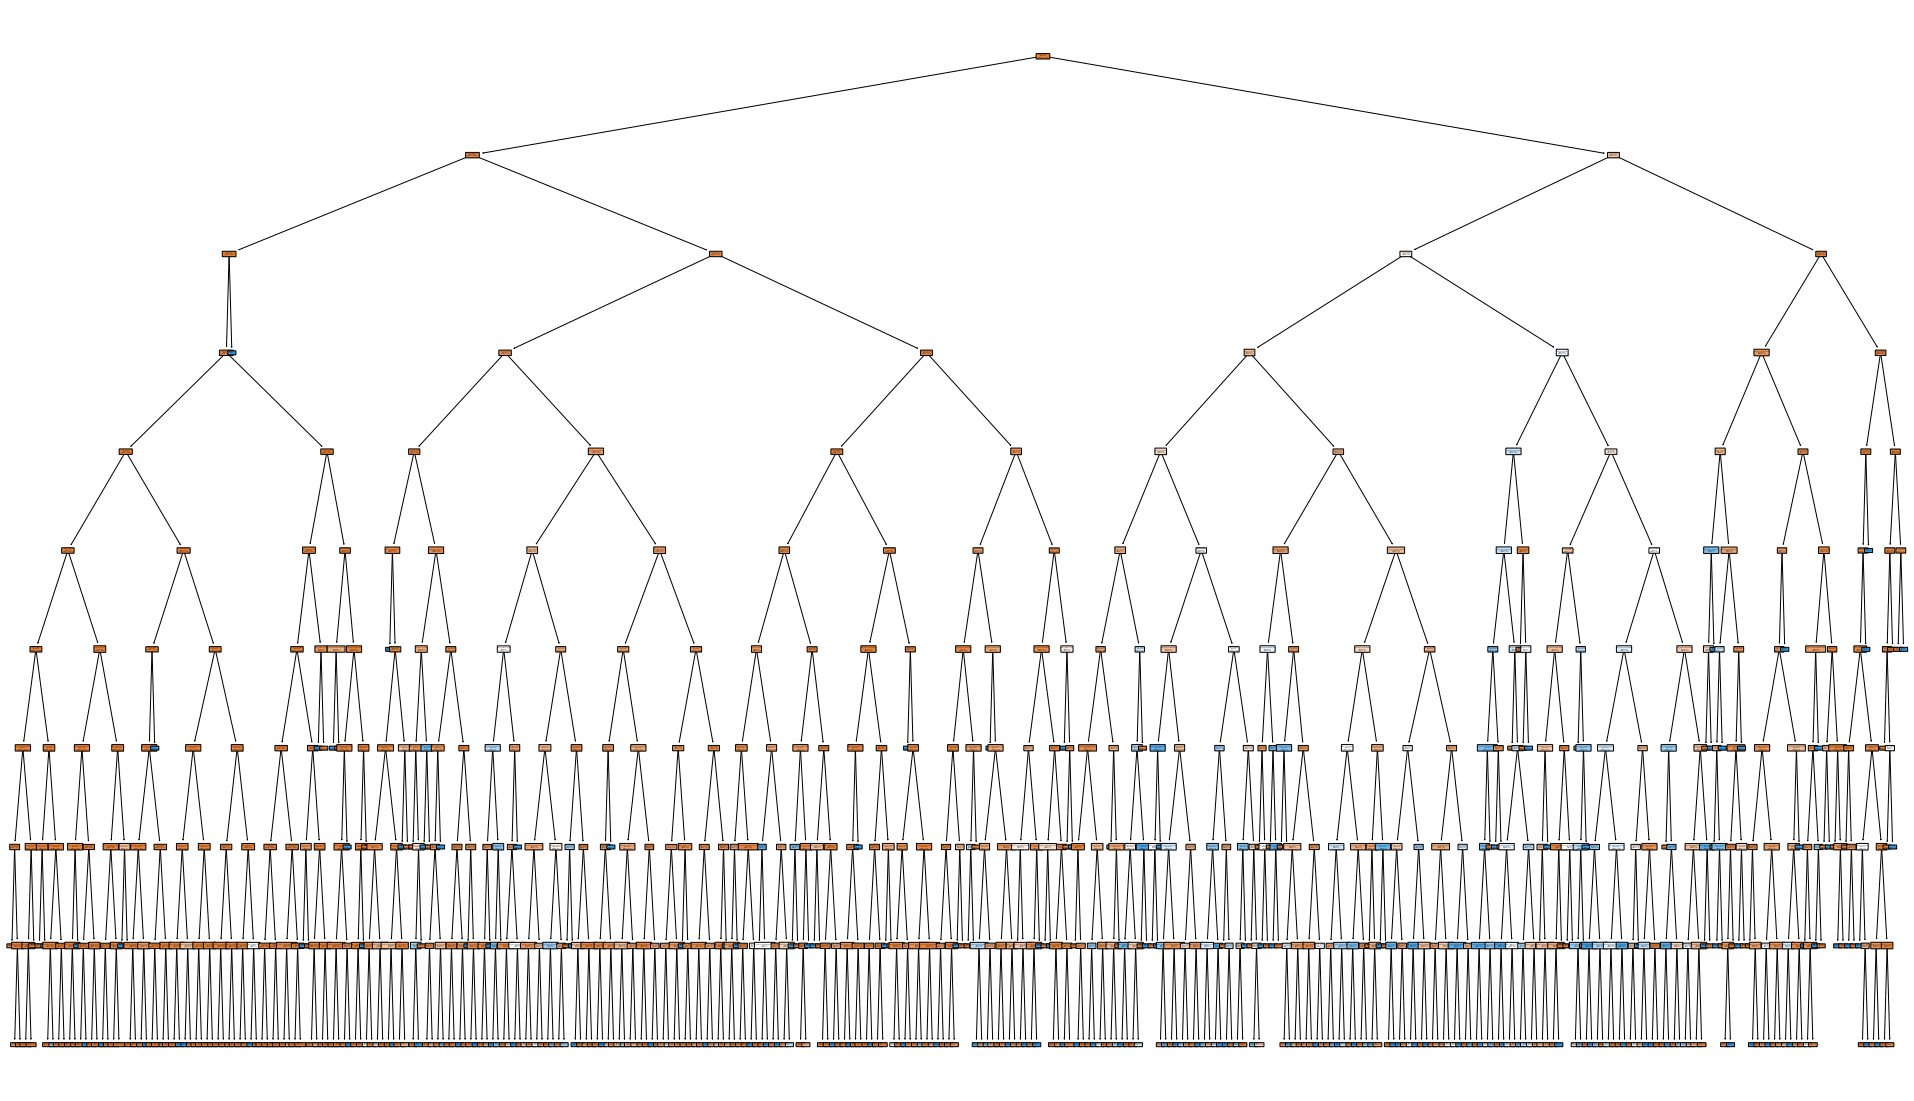

In [45]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(tree_model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

### Logistic Regression (Sup Learning)


In [50]:
# Logistic Regression (scaled data)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_y_pred_test = lr.predict(X_test_scaled)
lr_y_pred_train=lr.predict(X_train_scaled)

#### Metrics (Accuracy, Precision and Recall)

In [51]:
## calling the function to evaluate the calssification model
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, lr_y_pred_train,
                                                    y_test, lr_y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.99,0.99
1,Precision,0.00,0.00
2,Recall,0.00,0.00


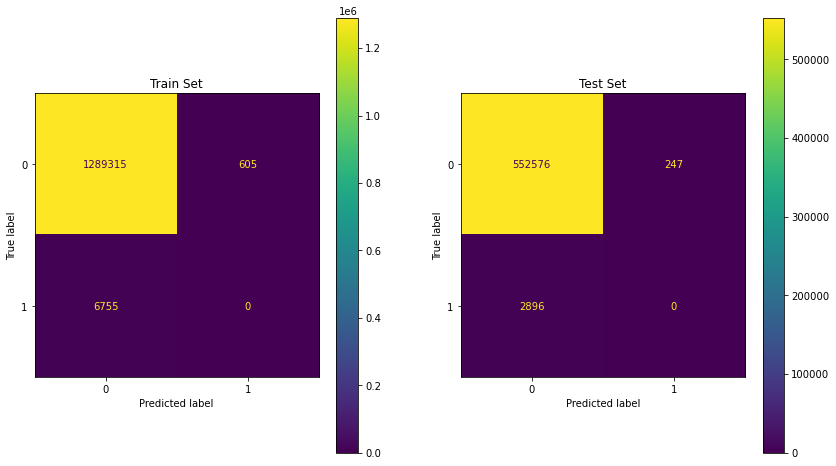

In [53]:
fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(lr,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(lr,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


### Random Forest (ensamble modeling)?? most used. Adv = Avoid the overfiting problem and gives better predictions when compared with a single model/ Computing time high


In [56]:
# 5. Random Forest Tree
rf = RandomForestClassifier(max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
rf.fit(X_train_scaled, y_train)
rf_y_pred_test = rf.predict(X_test_scaled)
rf_y_pred_train = rf.predict(X_train_scaled)

#### Metrics (Accuracy, Precision and Recall)

In [ ]:
#oob_score(asking for the score accurancy in the rest of training set, using as a validation set)/ bootstrap: give me the same amount of data and replacement
cross_val_scores = cross_val_score(rf, X_train, y_train, cv=5)
cross_val_scores

## Pre-processing to balance the data (Notebook :"Credit_Card_fraud_Detection_2_Balanced_data"

<b> SCALE DE DATA BEFORE TO DO THE SAMPLING METHODS.!!!!!
- It doesn't play much of a difference but you should do most pre-processing steps (encoding, normalization/standardization, etc) before under/over-sampling the data.

This is because many sampling techniques require a simple model to be trained (e.g. SMOTE uses a k-NN algorithm to generate samples, ClusteringCentroids under-sampling technique involves k-means clustering). These models have better performance on pre-processed datasets (e.g. both k-NN and k-means use euclidean distance, which requires the data to be normalized).

So, in order for the sampling techniques to work best, you should previously perform any pre-processing steps you can. That being said, if you use a random over/under-sampler, I don't think it plays much of a difference.

In [92]:
len(df1_c_num["zip"].unique())

985

In [93]:
df1_c_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   amt         float64
 2   zip         object 
 3   lat         float64
 4   long        float64
 5   city_pop    int64  
 6   unix_time   int64  
 7   merch_lat   float64
 8   merch_long  float64
 9   is_fraud    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 141.3+ MB


convert a zip column to dummies columns

In [97]:
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

### Taking the mos important categorical features state, category and "is_fraud" to convert in dummies

In [119]:
cat_val=pd.get_dummies(df1_c[["state", "category", "is_fraud"]], drop_first=True)
cat_val

,is_fraud,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1852390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1852391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1852392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
len(cat_val[cat_val.is_fraud == 1])
len(cat_val[cat_val.is_fraud == 0])

1842743

### Taking the numerical features amount, unix_time( transaction time)

In [132]:
num_val = df1_c_num[["amt","unix_time"]]

### Scaling the numerical dataset

In [133]:
#fit is to find the right parameters for the z function (in this case mean and standard deviation)
std_scaler = StandardScaler().fit(num_val)   ##. finding the parameters ( mean, variance from the training set )
#transform function compute the result for z function.
num_val_scaled = std_scaler.transform(num_val)

In [134]:
num_val_scaled = pd.DataFrame(data=num_val_scaled, columns =["amt", "unix_time"] )
num_val_scaled

,amt,unix_time
0,-0.41,-1.83
1,0.23,-1.83
2,0.94,-1.83
3,-0.16,-1.83
4,-0.18,-1.83
...,...,...
1852389,-0.17,1.64
1852390,0.26,1.64
1852391,0.11,1.64
1852392,-0.39,1.64


### Concatening the categorical and numerical

In [135]:
frames = [num_val_scaled, cat_val]
df_concat = pd.concat(frames,axis =1, join = 'inner')

In [136]:
df_concat

,amt,unix_time,is_fraud,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-0.41,-1.83,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.23,-1.83,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.94,-1.83,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.16,-1.83,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.18,-1.83,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,-0.17,1.64,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1852390,0.26,1.64,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1852391,0.11,1.64,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1852392,-0.39,1.64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [153]:
file_name =r"C:\Users\Barbara\OneDrive\Documents\GitHub\IH_final_project\Data\df_concat_dummies.csv"
df_concat.to_csv(file_name, encoding='utf-8', index=False)